# <span style="color:green;">**Efficient frontier**</span>

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

### <span style="color:green;">1.1 Minimum variance portfolio with two risky assets</span>

Assume we have two assets $X$ and $Y$ with mean of log-returns $\mu_{X}$, $\mu_{Y}$ and variance $\sigma_{X}^{2}$ and $\sigma_{Y}^{2}$. Their values are given by:

| Asset | $\mu$ | $\sigma$ |
|----------|----------|----------|
| $X$ | 12% | 4% |
| $Y$ | 8% | 3% |

and assume that they have a correlation of $\rho=0.65$.

Assume we are investors and we want to choose how much to invest (in percentage) in the asset $X$ (by choosing $w \in [0,1]$) and how much to invest in $Y$ (using the remaning amount $1-w$).
We are free to choose $w$ and, depending on its value, we have that the mean return of portfolio $\mu(w)$ and the portfolio variance $\sigma^{2}(w)$ are given by:

\begin{align*}
& \mu(w) = w\mu_{X} + (1-w)\mu_{Y}, \\
& \sigma(w)^{2} = w^{2}\sigma_{X}^{2} + (1-w)^{2}\sigma_{Y}^{2} + 2w(1-w)\rho\sigma_{X}\sigma_{Y}.
\end{align*}

$\sigma(w)^{2}$ is called portfolio variance. Now we want to plot the couples $\left(\mu(p),\sigma(p)\right)$ for all possible values $w \in [0,1]$.

Text(0.5, 1.0, 'Frontier with two risky assets')

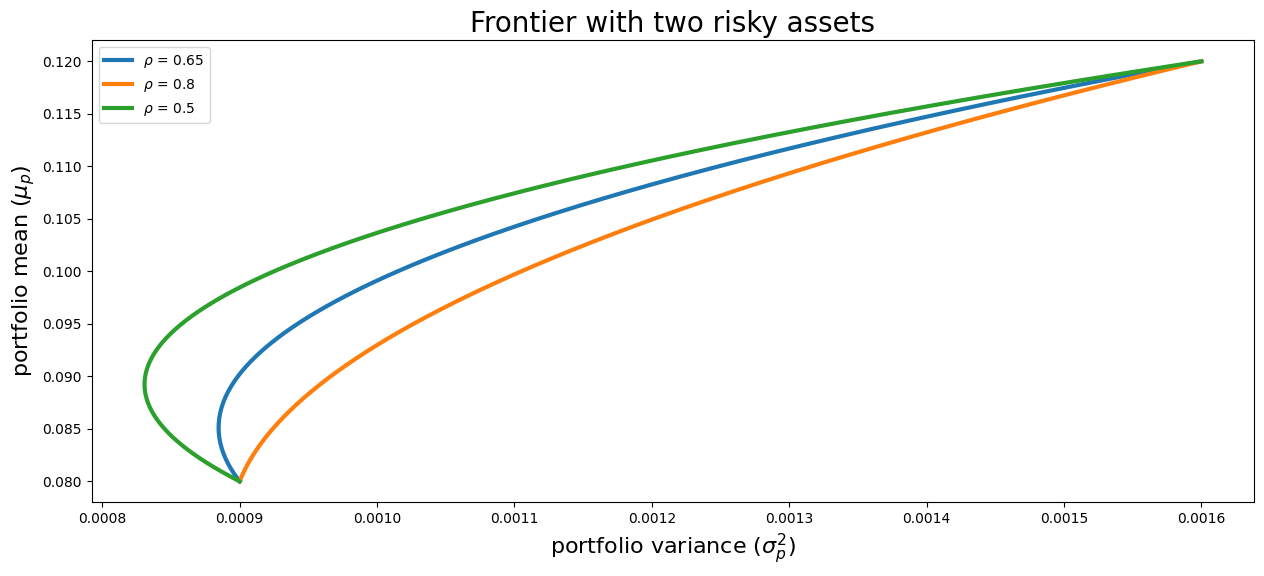

In [2]:
# Set variables
mu_X = 0.12
mu_Y = 0.08
sigma_X = 0.04
sigma_Y = 0.03
rho = 0.65
rho_test_big = 0.8 # try varying
rho_test_small = 0.5 # try varying

def mu_func(w, mu_X, mu_Y):
    return w*mu_X + (1-w)*mu_Y

def sigma_func(w, sigma_X, sigma_Y, rho):
    return w**2 * sigma_X**2 + (1-w)**2 * sigma_Y ** 2 + 2*rho*sigma_X*sigma_Y*w*(1-w)

# Initialize the weights (let us consider 2000 points between 0 and 1)
w = np.linspace(0,1,2000)

# compute the portfolio mean and standard deviation
mu = mu_func(w, mu_X, mu_Y)

sigma = sigma_func(w, sigma_X, sigma_Y, rho)

sigma_test_big = sigma_func(w, sigma_X, sigma_Y, rho_test_big)

sigma_test_small = sigma_func(w, sigma_X, sigma_Y, rho_test_small)

# Now plot
# Specify the dimensions (width, height) in inches
fig_width = 15
fig_height = 6

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Plotting the data with labels
plt.plot(sigma, mu, linewidth=3, label=r'$\rho$ = {}'.format(rho))
plt.plot(sigma_test_big, mu, linewidth=3, label=r'$\rho$ = {}'.format(rho_test_big))
plt.plot(sigma_test_small, mu, linewidth=3, label=r'$\rho$ = {}'.format(rho_test_small))

plt.legend()

# Adding labels and title
plt.xlabel(r'portfolio variance ($\sigma_{p}^{2})$', fontsize=16)
plt.ylabel(r'portfolio mean ($\mu_{p}$)', fontsize=16)
plt.title('Frontier with two risky assets', fontsize=20)

It's clear that the behavior of the frontier varies with the correlation $\rho$, in paricular, "big" values of $\rho$ leads the frontier "to the right", while "small" values of $\rho$ leads the frontier "to the left".

### <span style="color:green;">1.2 The minimum variance portfolio with two assets</span>

Assume now that we want to find the minimum variance portfolio, name we want to find $w^{*}$ such that:

\begin{equation*}
w^{*} = \argmin_{w \in [0, 1]} \sigma^{2}(w)
\end{equation*}

In this simple case we can compute $w^{*}$ analytically by taking the derivative of $\sigma^{2}(w)$ and equating it to zero:
\begin{equation*}
\frac{\partial \sigma^{2}(w)}{\partial w} = w\left(\sigma_{X}^{2} + \sigma_{Y}^{2} - 2 \rho \sigma_{X}\sigma_{Y}\right) - \sigma_{Y}^{2} + \rho \sigma_{X}\sigma_{Y}=0,
\end{equation*}

and hence:
\begin{equation*}
w^{*} =  \frac{ \sigma_{Y}^{2} - \rho \sigma_{X}\sigma_{Y}}{\sigma_{X}^{2} + \sigma_{Y}^{2} - 2 \rho \sigma_{X}\sigma_{Y}}.
\end{equation*}

Now check numerically that the minimum is attained fot the computed $w^{*}$. We check that $(r(w^{*}),\sigma^{2}(w^{*}))$ corresponds to the most left-hand point in the above picture.

In [3]:
# function that computes the best portfolio weights under the assumption of minimazing the portfolio variance

def w_opt (sigma_X, sigma_Y, rho):
    return (sigma_Y**2 - sigma_X*sigma_Y*rho)/(sigma_X**2 + sigma_Y**2 - 2*sigma_X*sigma_Y*rho)

w* :  0.1276595744680851
mu* :  0.08510638297872342
sigma* :  0.029743585040539915


Text(0.5, 1.0, 'Minimum variance portfolio')

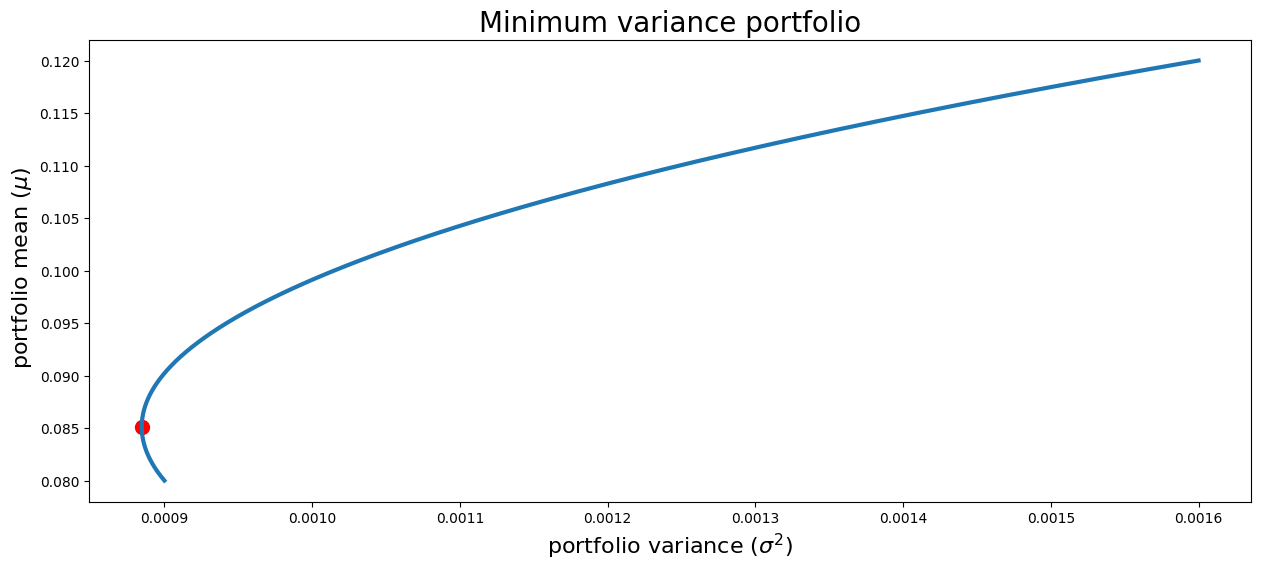

In [4]:
# Plot the minimum variance portfolio

# compute the portfolio mean and standard deviation when we use w*

# FILL THE GAP
w_star = w_opt(sigma_X, sigma_Y, rho)
mu_star = mu_func(w_star, mu_X, mu_Y)
sigma_star = sigma_func(w_star, sigma_X, sigma_Y, rho)

print ("w* : ", w_star)
print ("mu* : ", mu_star)
print ("sigma* : ", np.sqrt(sigma_star))


# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Plotting the data
plt.plot(sigma, mu, linewidth=3)

# Adding labels and title
plt.xlabel(r'portfolio variance ($\sigma^{2})$', fontsize=16)
plt.ylabel(r' portfolio mean ($\mu$)', fontsize=16)
plt.scatter(sigma_star, mu_star, color='red', marker='o', s=100)
plt.title('Minimum variance portfolio', fontsize=20)

#### <span style="color:green;">1.2.1 Excercize</span>

Check that this values coincides with the explicit formula you have from class notes. Add a point in the previous graph which have to coincide with the red one.

(Hint) Compute A,B,C and D

\begin{align*}
A & = \mathbb{1}^{T}\Sigma^{-1}\mu \\
B & = \mu^{T}\Sigma^{-1}\mu \\
C & = \mathbb{1}^{T}\Sigma^{-1}\mathbb{1} \\
D & = BC - A^2
\end{align*}

and recall that the minumum variance portfoglio has $\underline{\mu}_{p}= \frac{A}{C}$ and $\underline{\sigma}_{p}^{2}= \frac{1}{C} $.

Analytical way
mu* :  0.08510638297872342
sigma* :  0.029743585040539915
Shortcut way
mu* :  [[0.08510638]]
sigma* :  [[0.02974359]]

Both ways give the same result!


Text(0.5, 1.0, 'Minimum variance portfolio')

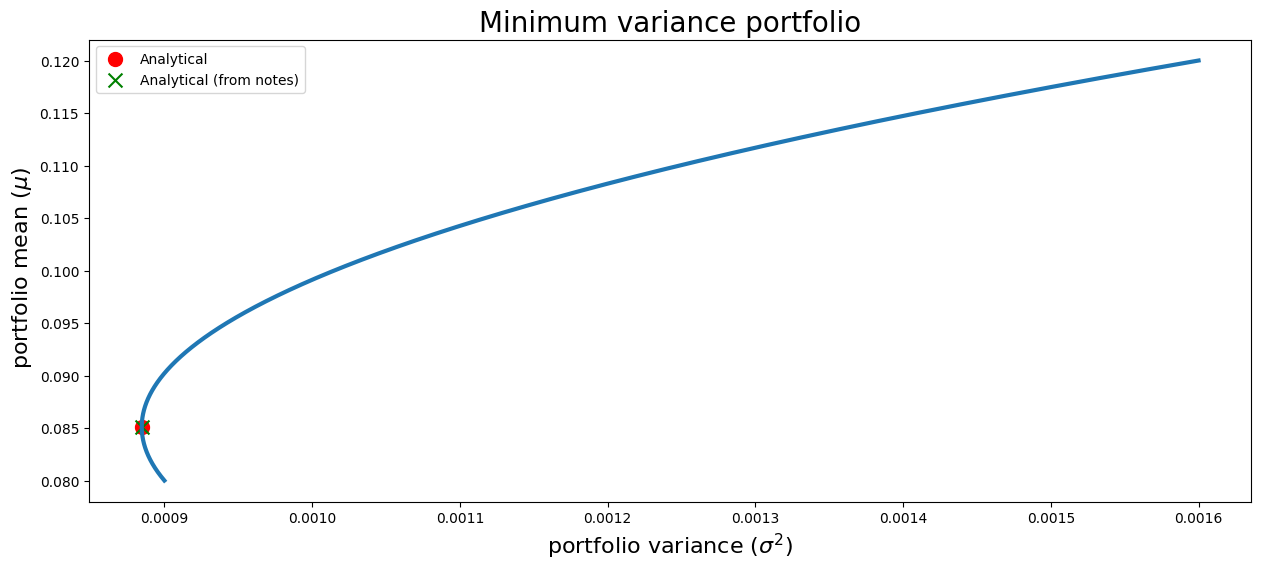

In [5]:
# Compute A,B,C and D
mu_vec = np.array([mu_X, mu_Y])

sigma_matrix = np.array([[sigma_X**2.0, sigma_X*sigma_Y*rho], [sigma_X*sigma_Y*rho, sigma_Y**2.0]])
sigma_matrix_inv = np.linalg.inv(sigma_matrix)
ones_vec = np.ones((2,1))

A = np.dot(np.dot(ones_vec.T,sigma_matrix_inv),mu_vec)
B = np.dot(np.dot(mu_vec.T,sigma_matrix_inv),mu_vec)
C = np.dot(np.dot(ones_vec.T,sigma_matrix_inv),ones_vec)
D = B*C-A**2

sigma_p = 1/C
mu_p = A/C

print ("Analytical way")
print ("mu* : ", mu_star)
print ("sigma* : ", np.sqrt(sigma_star))
print ("Shortcut way")
print("mu* : ", mu_p)
print("sigma* : ", np.sqrt(sigma_p))

print ("\nBoth ways give the same result!")

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Plotting the data
plt.plot(sigma, mu, linewidth=3)

# Adding labels and title
plt.xlabel(r'portfolio variance ($\sigma^{2})$', fontsize=16)
plt.ylabel(r' portfolio mean ($\mu$)', fontsize=16)
plt.scatter(sigma_star, mu_star, color='red', marker='o', s=100, label="Analytical")
plt.scatter(sigma_p, mu_p, color='green', marker='x', s=100, label="Analytical (from notes)")
plt.legend()
plt.title('Minimum variance portfolio', fontsize=20)

### <span style="color:green;">1.3 Numerical mean variance portfolio two risky assets</span>

Clearly the problem above can be solved numerically by using the Python library **scipy** and the function **minimize scalar**, which solves a minimizes a single variable optimization problem.

w* :  0.12765957446808485
mu* :  0.08510638297872339
sigma* :  0.029743585040539915


Text(0.5, 1.0, 'Minimum variance portfolio')

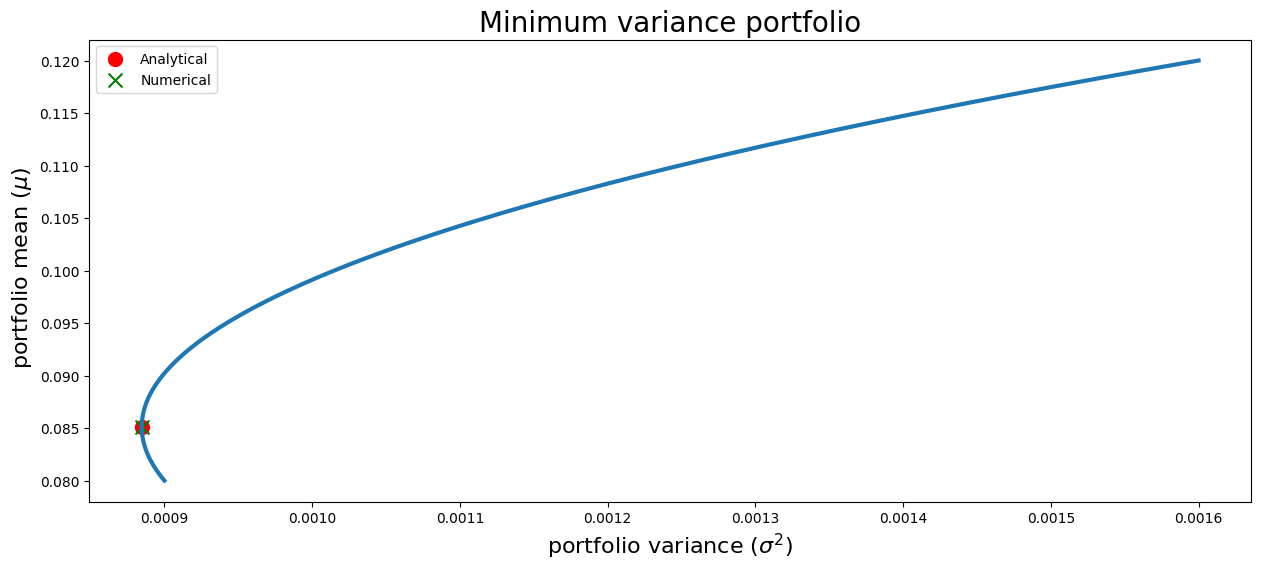

In [6]:
# FILL THE GAP: Write a function which computes the portfolio variance and tha has to be passed to minimize_scalar as function to minimize.
def portfolio_variance_toy(w):
    return w**2 * sigma_X**2 + (1-w)**2 * sigma_Y ** 2 + 2*rho*sigma_X*sigma_Y*w*(1-w)

# FILL THE GAP:
# Call the "optimizer"
result = minimize_scalar(portfolio_variance_toy, bounds=(0,1), method='bounded')


print ("w* : ", result.x)
print ("mu* : ", mu_func(result.x, mu_X, mu_Y))
print ("sigma* : ", np.sqrt(result.fun))

# Get the results
w_star_num = result.x

# FILL THE GAP
mu_star_num = mu_func(w_star_num, mu_X, mu_Y)
sigma_star_num = sigma_func(w_star_num, sigma_X, sigma_Y, rho)


# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Plotting the data
plt.plot(sigma, mu, linewidth=3)

# Adding labels and title
plt.xlabel(r'portfolio variance ($\sigma^{2})$', fontsize=16)
plt.ylabel(r' portfolio mean ($\mu$)', fontsize=16)
plt.scatter(sigma_star, mu_star, color='red', marker='o', s=100, label='Analytical')
plt.scatter(sigma_star_num, mu_star_num, color='green', marker='x', s=100, label='Numerical')
plt.legend()
plt.title('Minimum variance portfolio', fontsize=20)

## <span style="color:green;">**2. A real world application of the efficient frontier**</span>

[A nice video](https://www.youtube.com/watch?v=f2BCmQBCwDs).

We want to construct the minimum variance portfolio using four risky assets: Google, Tesla, Apple and Amazon. We get the data from [Yahoo Finance](https://finance.yahoo.com/) and we download monthly returns from 1/1/2011 to 31/12/2023.
The exercize is divided in several steps:

1. Data import from .csv files and preparation using **pandas**.
2. Computation of mean and variance of assets log-returns.
3. Creation of the minimum variance portfolio given a certain mininum expected return.
4. Construction of the Markowitz efficient frontier

### <span style="color:green;">2.1 Data import with pandas</span>

First of all we use **pandas** Python library to read data from .csv file and to prepare data.

In [7]:
# Read the data
google = pd.read_csv(r"data/GOOG.csv")
amazon = pd.read_csv(r"data/AMZN.csv")
tesla = pd.read_csv(r"data/TSLA.csv")
apple = pd.read_csv(r"data/AAPL.csv")

In [8]:
# data inspection
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-01,9.0685,9.5800,8.3450,8.4820,8.4820,2272226000
1,2011-02-01,8.5260,9.5700,8.4755,8.6645,8.6645,1915528000
2,2011-03-01,8.6765,9.0785,8.0295,9.0065,9.0065,2379582000
3,2011-04-01,9.0790,9.8900,8.7685,9.7905,9.7905,2334988000
4,2011-05-01,9.8285,10.3195,9.5440,9.8345,9.8345,2125490000


In [9]:
# Merge the dataframe in a single one
stocks = pd.concat([google['Close'], amazon['Close'], tesla['Close'], apple['Close'] ],axis=1)

# Assign name to colums and dates
stocks.columns = ["google", "amazon", "tesla", "apple"]
dates = google["Date"]
stocks.index = dates

# Display the dataframe
stocks.head()
stocks.tail()

,google,amazon,tesla,apple
Date,,,,
2023-08-01,137.350006,138.009995,258.079987,187.869995
2023-09-01,131.850006,127.120003,250.220001,171.210007
2023-10-01,125.300003,133.089996,200.839996,170.770004
2023-11-01,133.919998,146.089996,240.080002,189.949997
2023-12-01,142.820007,153.410004,256.609985,193.050003


### <span style="color:green;">2.2 Looking for all possible portfolios </span>

We compute the monthly log-returns as follow:
\begin{equation*}
r_{t} = \log \frac{p_{t+1}}{p_{t}}
\end{equation*}

where $p_{t}$ is the price at time $t$ and we set $r$ as the vector of the means of log-returns: $r = [r_{1}, r_{2}, r_{3}, r_{4}]$.

On the other hand, the expected return and the variance of the portfolio is given by:

\begin{equation*}
R(w) = w^{T} r
\end{equation*}

\begin{equation*}
\sigma(w)^{2} = w^{T} \Sigma w
\end{equation*}


where $w = [w_{1}, w_{2}, w_{3}, w_{4}]$ with $\sum_{i=1}^{4} w_{i} = 1$ and $\Sigma$ is the covariance matrix of log-returns.


In [10]:
# Compute log-returns
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()


# Compute the covariance matrix and the mean of log-returns
sigma_logret = log_returns.cov()
mean_logret = log_returns.mean()

In [11]:
print("Expected returns: ")
print(mean_logret)

print("Covariance matrix")
print(sigma_logret)

Expected returns: 
google    0.014559
amazon    0.018679
tesla     0.032732
apple     0.017859
dtype: float64
Covariance matrix
          google    amazon     tesla     apple
google  0.004655  0.003165  0.003550  0.002350
amazon  0.003165  0.007154  0.004711  0.003212
tesla   0.003550  0.004711  0.026630  0.004951
apple   0.002350  0.003212  0.004951  0.006125


Now we generate "all-possible" portfolios picking up randomly the weight vector $w = [w_{1}, w_{2}, w_{3}, w_{4}]$. Hence we compute the expected returns and the expected variance for each of them and we draw the scatter plot of points $(R(w),\sigma(w))$.

In [12]:
# Now compute the scatter plot of possible portfolio

# number of portofolios to construct (randomly)
no_portfolio = 25000

weights = np.zeros((no_portfolio, 4))
expected_ret = np.zeros(no_portfolio)
expected_volatility = np.zeros(no_portfolio)


for k in range(no_portfolio):
    # Generate random numbers
    w = np.array(np.random.random(4))
    w = w/np.sum(w) # --> Is this check accurate?
    weights[k,:] = w
    expected_ret[k] = np.sum(w*mean_logret)
    expected_volatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma_logret,w)))

Text(0.5, 1.0, 'mean-variance scatter plot')

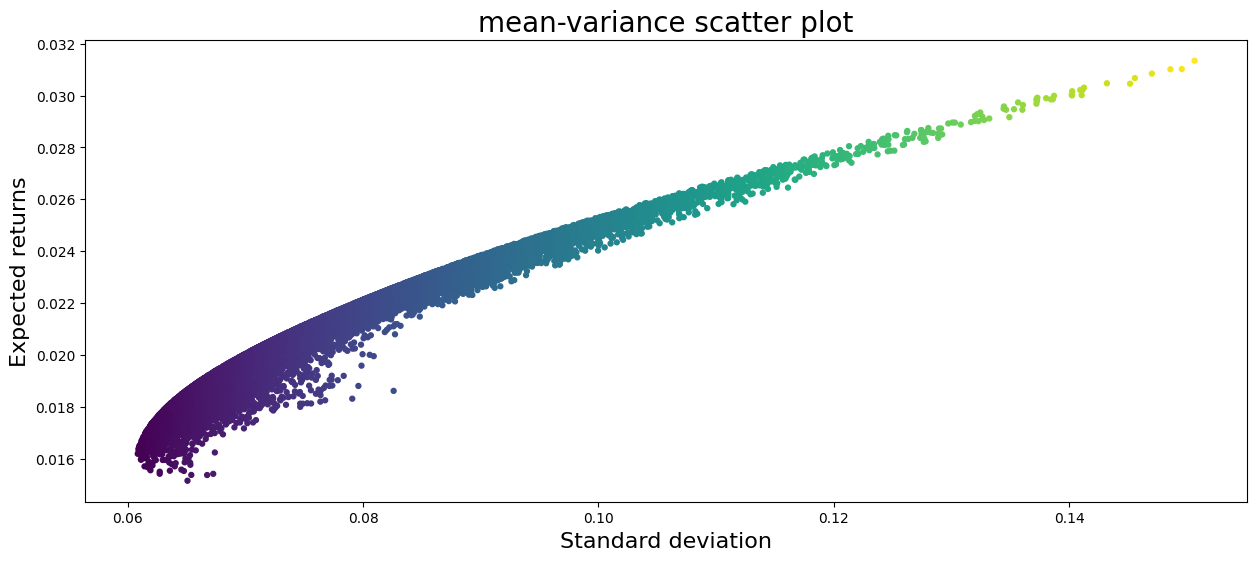

In [13]:
# Now a nice plot!

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=50)
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Standard deviation', fontsize=16)
plt.title('mean-variance scatter plot', fontsize=20)

From this picture is clear that non every possible combinations of weights $w$ is efficient, that is, there are some portfolios that are dominated by others. The efficient frontier is the set of all portfolios that are efficient, that is, the set of all portfolios that are not dominated by any other portfolio.

### <span style="color:green;">2.3 Maximization of quadratic utility </span>

Let $G(\mu_{p}, \sigma_{p}) = \mu_{p} - \gamma \frac{\sigma_{p}^{2}}{2}$ be the quadratic utility function, with $\gamma>0$ is given. Let's solve the following problem:

\begin{align*}
    & \max_{w} w^{T} \mu - \frac{\gamma}{2} w^{T}\Sigma w \\
    & 1^{T}w = 1.
\end{align*}

**Remark:** you need to recast the problem as a minimization problem (change of sign) and use the function **minimize** from **scipy**.

Note that in this case we are not interested in finding the best portofilio that achieves the minimum variance, but we are interested in finding the best portfolio that maximizes the quadratic utility function.

In [14]:
gamma = 5

def expected_utility(w):
    " This function compute the portfolio variance"
    return -(np.dot(w.T, mean_logret)-0.5*gamma*np.dot(w.T, np.dot(sigma_logret,w)))


def check_sum_to_one(w):
    "This function checks that weights sum up to one"
    return np.sum(w) - 1


# Initial guess
w0 = np.array([0.15, 0.30, 0.12, 0.28])

# Bounds for weights
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Constraints
constraints = ({'type': 'eq', 'fun': check_sum_to_one})    # equality constraint

# Optimization routine
results = minimize(expected_utility, x0=w0, method="SLSQP", bounds=bounds, constraints=constraints)

w_star = results.x

print("Optimal weights: ", w_star)

Optimal weights:  [0.32304746 0.22001489 0.12082691 0.33611074]


**Remark:** numerical method used is sensitive to the initial guess!

#### <span style="color:green;">2.3.1 Numerical and analytic solutions comparison </span>

Recall that the previous problem admits a analytical solution. Compute the analytical solution and check that it coincides with the numerical one.

In [15]:
def w_star_func (gamma, A, C, sigma_inv, mean):
    ones_vec = np.ones(mean.shape[0])
    return (A/gamma)*np.dot(sigma_inv,mean)/A + (1-A/gamma)*np.dot(sigma_inv,ones_vec)/C

sigma_matrix_inv = np.linalg.inv(sigma_logret)
ones_vec =  np.ones(4)

A = np.dot(np.dot(ones_vec.T,sigma_matrix_inv),mean_logret)
B = np.dot(np.dot(mean_logret.T,sigma_matrix_inv),mean_logret)
C = np.dot(np.dot(ones_vec.T,sigma_matrix_inv),ones_vec)
D = B*C-A**2

w_star_analytic = w_star_func(gamma, A, C, sigma_matrix_inv, mean_logret)

expected_utility_numerical = results.fun
expected_utility_numerical = expected_utility(w_star)
expected_utility_analytic = expected_utility(w_star_analytic)

# Weights
print("Analytical solution: ", w_star_analytic)
print("Numerical solution: ", w_star)

# Sum of weights
print("\nAnalytical solution: ", np.sum(w_star_analytic))
print("Numerical solution: ", np.sum(w_star))

Analytical solution:  [0.3281523  0.2231252  0.12133784 0.32738466]
Numerical solution:  [0.32304746 0.22001489 0.12082691 0.33611074]

Analytical solution:  1.0000000000000002
Numerical solution:  1.0


You can see how both ways lead to the same solution up to round-off errors.

You can check that the expected utility of the optimal portfolio can be computed accordingly in the following ways.

In [16]:
expected_utility_numerical = -results.fun # eploitinf scipy minimize
print("Expected utility (1): ", expected_utility_numerical)
expected_utility_numerical = -expected_utility(w_star) # exploiting the hand-made function with numerical solution
print("Expected utility (2): ", expected_utility_numerical)
expected_utility_analytic = -expected_utility(w_star_analytic) # exploiting the hand-made function with analytical solution
print("Expected utility (3): ", expected_utility_numerical)
print(1/C * (A + D/gamma))


Expected utility (1):  0.008075628299005483
Expected utility (2):  0.008075628299005483
Expected utility (3):  0.008075628299005483
0.018763760229344603


Same for the expected return and the expected variance of the optimal portfolio.

In [17]:
# expected return
print(1/C * (A + D/gamma))
print(np.dot(mean_logret.T, w_star_analytic))

0.018763760229344603
0.018763760229344603


In [18]:
# expected variance
print(1/C * (1+(D/gamma**2)))
print(np.dot(w_star_analytic.T, np.dot(sigma_logret, w_star_analytic)))

0.004274882769616205
0.004274882769616205


##### <span style="color:green;">2.3.2 Analytic efficient frontier </span>

Recall that the efficient frontier satisfies the following equation:

\begin{equation*}
\frac{\sigma_{p}^{2}}{\tilde{a}^2} - \frac{\left(\mu_{p} - \underline{\mu}\right)}{\tilde{b}^{2}} = 1
\end{equation*}
with the following:

\begin{align*}
& \underline{\mu}  = \frac{A}{C},
& \underline{\sigma}^{2}  = \frac{1}{C} \\
& \tilde{a} = \sqrt{\underline{\sigma}^{2}},
& \tilde{b} = \frac{\sqrt{D}}{C} \\
& \mu_{p} = \frac{1}{C} \left(A + \frac{D}{\gamma}\right),
& \sigma_{p}^{2} = \frac{1}{C}\left(1 + \frac{D}{\gamma^{2}}\right)
\end{align*}

Draw the efficient frontier with of the portfolio composed by Google, Amazon, Tesla and Apple. Use the following code as a possible way to plot an Hyperbola in python.

\begin{equation*}
\frac{(x-h)^{2}}{a^{2}} - \frac{(y-k)^{2}}{b^{2}} = 1.
\end{equation*}

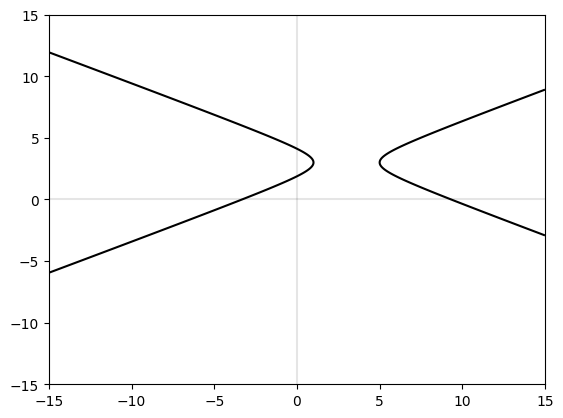

In [19]:
# FILL THE GAP
# The following code plot a general Hyperbola

h = 3  # x - center
k = 3  # y - center
a = 2  # first axes
b = 1  # second axes

# set some color
mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])

# Create a grid to plot the hyperbola
x = np.linspace(-15, 15, 400)
y = np.linspace(-15, 15, 400)
x, y = np.meshgrid(x, y)

# Just a function to help you with the Plot
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)


# Plot the Equation of an Hyperbola
axes()
plt.contour(x, y,((x-h)**2/a**2 - (y-k)**2/b**2), [1], colors='k')
plt.show()

Text(0.5, 1.0, 'Efficient frontier')

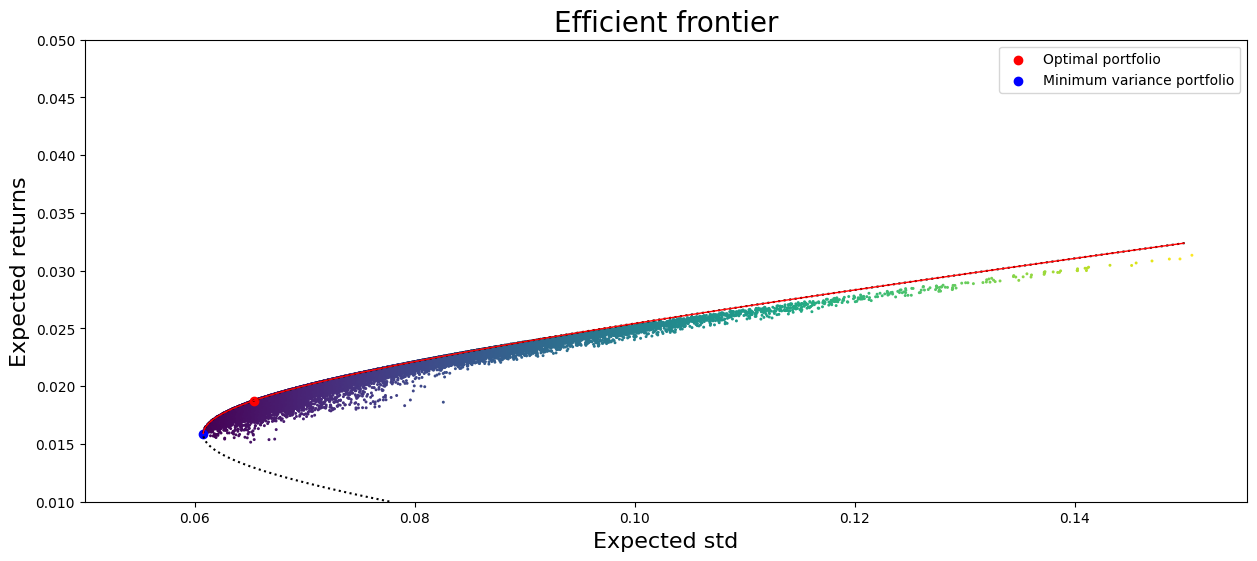

In [20]:
# FILL THE GAP

# Draw the efficient frontier with of the portfolio composed by Google, Amazon, Tesla and Apple.
# Use the previous code as a possible way to plot an Hyperbola in python
gamma = 5
mu_p = 1/C * (A + D/gamma) # the optimal expected return
sigma_p = np.sqrt(1/C * (1 + D/gamma**2)) # the optimal expected variance

# Set the parameters of the equation
h = 0
k = A/C
a_tilde = np.sqrt(1/C)
b_tilde = np.sqrt(D)/C

mu_ = A/C
sigma_ = a_tilde

# Now a nice plot!
# Prepare the grid
x = np.linspace(0.05, 0.15, 400)
y = np.linspace(0.01, 0.05, 400)
x, y = np.meshgrid(x, y)

# efficient frontier branch grid
x_ = np.linspace(sigma_, 0.15, 400)
y_ = np.linspace(mu_, 0.05, 400)
x_, y_ = np.meshgrid(x_, y_)

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=5)
plt.contour(x, y,((x-h)**2/a_tilde**2 - (y-k)**2/b_tilde**2), [1], colors='k',  linestyles='dotted')
plt.contour(x_, y_, ((x_-h)**2/a_tilde**2 - (y_-k)**2/b_tilde**2), [1], colors='red', linewidths=1)
plt.scatter(sigma_p, mu_p, color="red", marker='o', label="Optimal portfolio") # max utility
plt.scatter(sigma_, mu_, color="blue", marker='o', label="Minimum variance portfolio")
plt.legend()

plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected std', fontsize=16)
plt.title('Efficient frontier', fontsize=20)


In [21]:
print("Optimal portfolio: ")
print("Expected return: ", mu_p)
print("Expected std: ", sigma_p)
print("Expected variance: ", sigma_p**2) # same as the one computed before

print("\nMinimum variance portfolio: ")
print("Expected return: ", mu_)
print("Expected std: ", sigma_)
print("Expected variance: ", sigma_**2)

Optimal portfolio: 
Expected return:  0.018763760229344603
Expected std:  0.0653825876638131
Expected variance:  0.004274882769616204

Minimum variance portfolio: 
Expected return:  0.015855101385712736
Expected std:  0.06077130079971821
Expected variance:  0.003693151000889831
